In [1]:
import os
import mne
import tqdm
import collections
import numpy as np
import matplotlib.pyplot as plt

In [2]:
tmin, tmax = -0.2, 1.2
picks = 'mag'
decim = 12
n_jobs = 48
show = True
spacing = 'oct6'
times = [0.3, 0.4, 0.5, 0.6, 0.8]

In [3]:
FS_subjects_dir = os.path.join('D:\\', 'freesurfer', 'subjects')
MEG_subjects_dir = os.path.join('D:\\', 'RSVP_data', 'processed_data')
Subject_ids = 'S{id:02d}'

S01 RSVP_MRI_S01
********************************************************************************
         to build the TVTK classes (8.2). This may cause problems.
         Please rebuild TVTK.
********************************************************************************



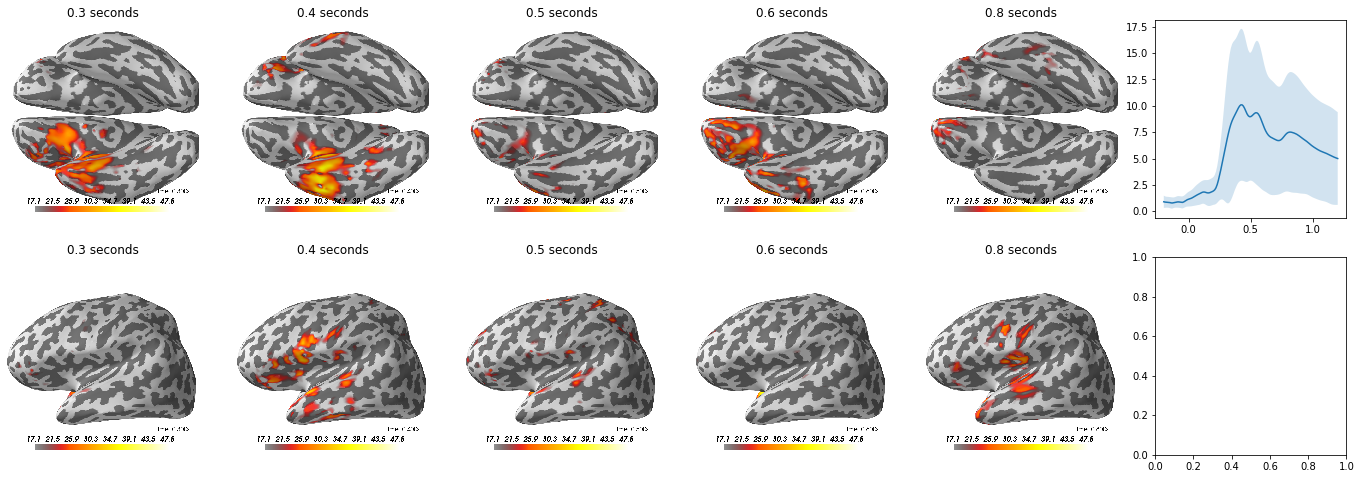

S02 RSVP_MRI_S02


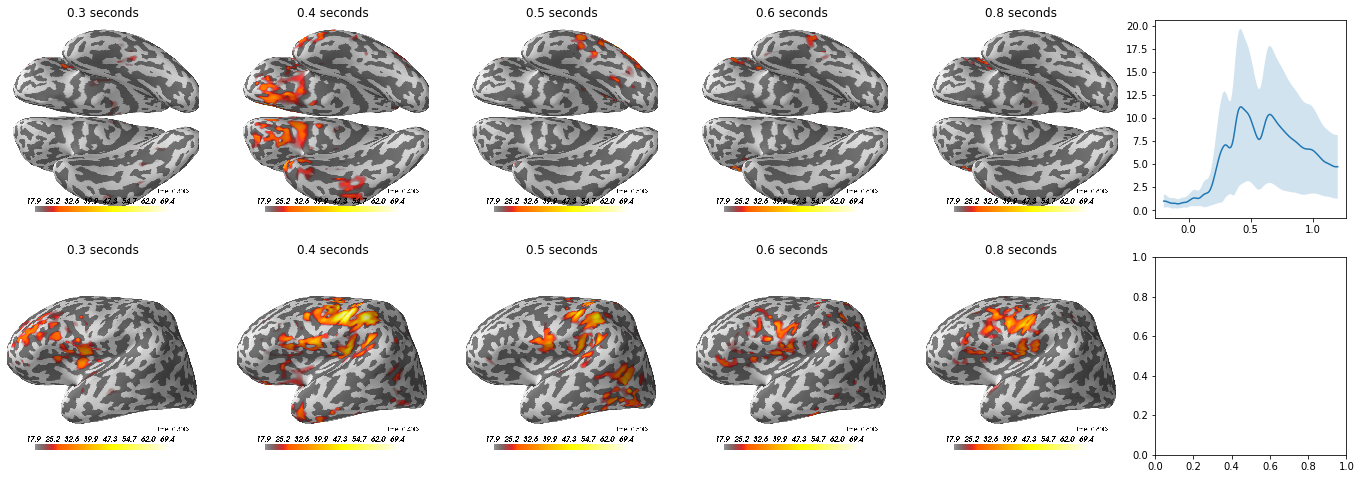

S03 RSVP_MRI_S03


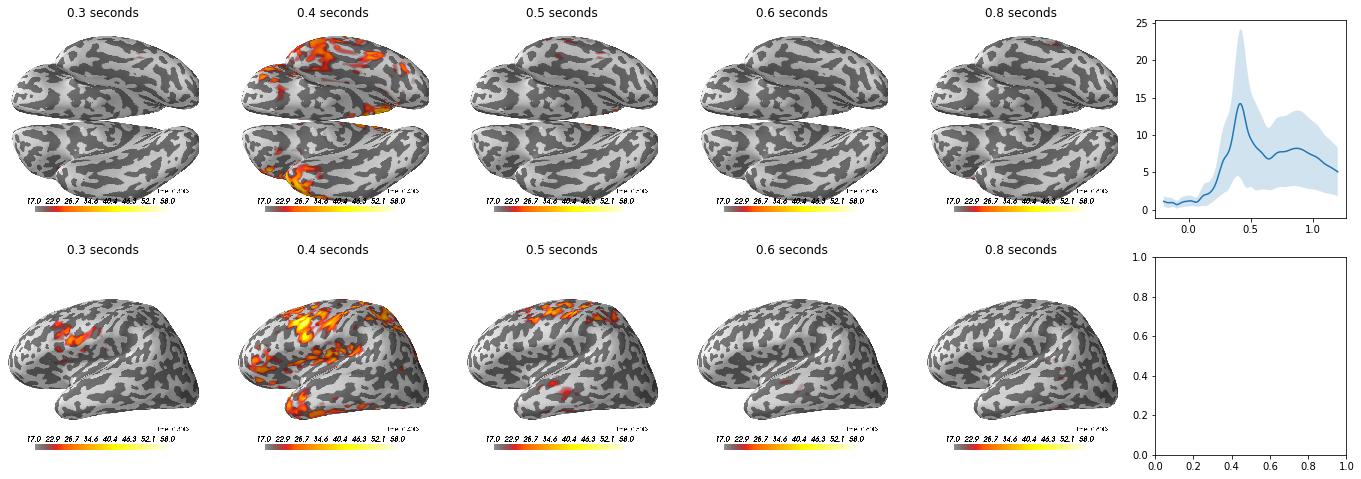

S04 RSVP_MRI_S04


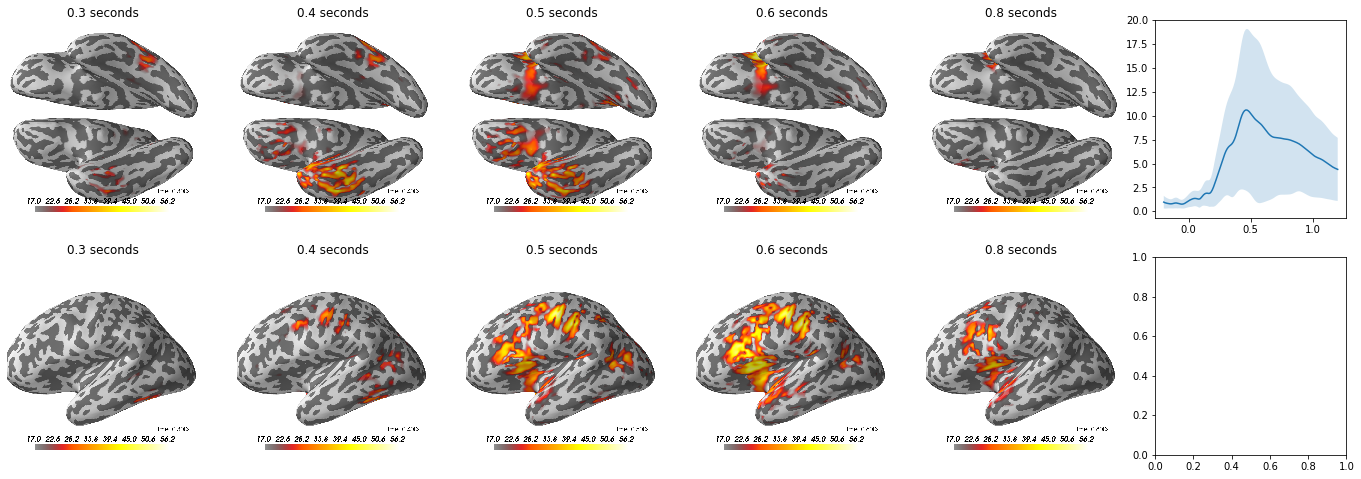

S05 RSVP_MRI_S05


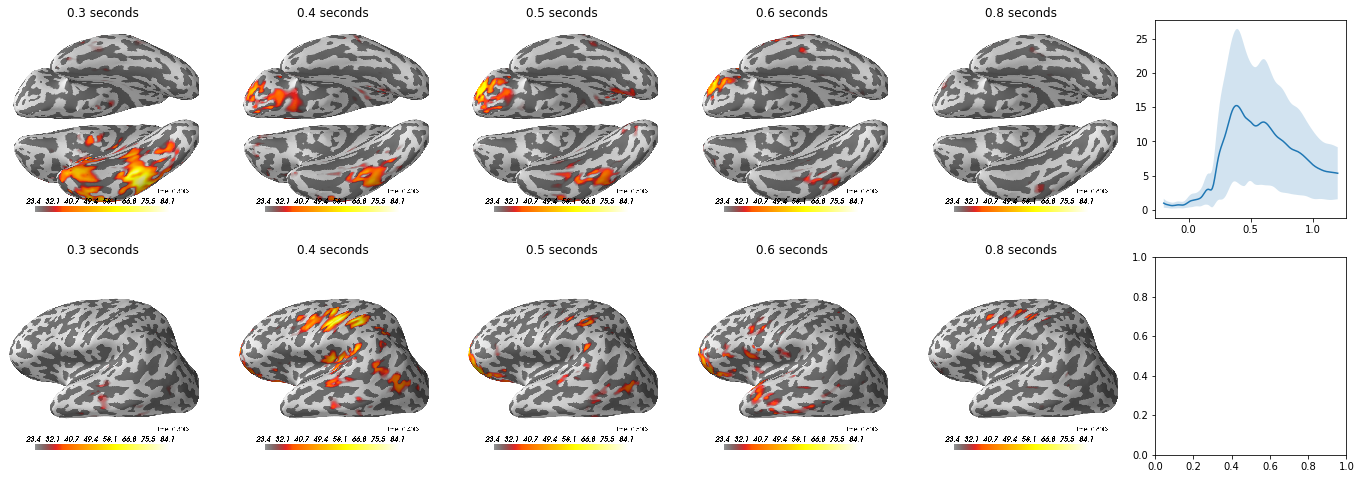

S06 RSVP_MRI_S06


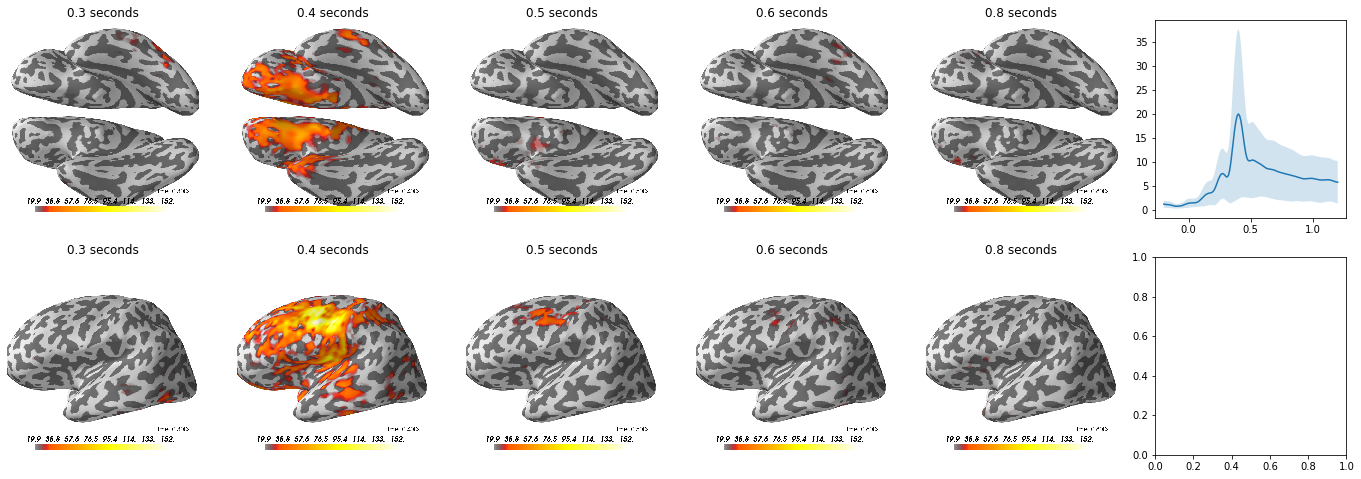

S07 RSVP_MRI_S07


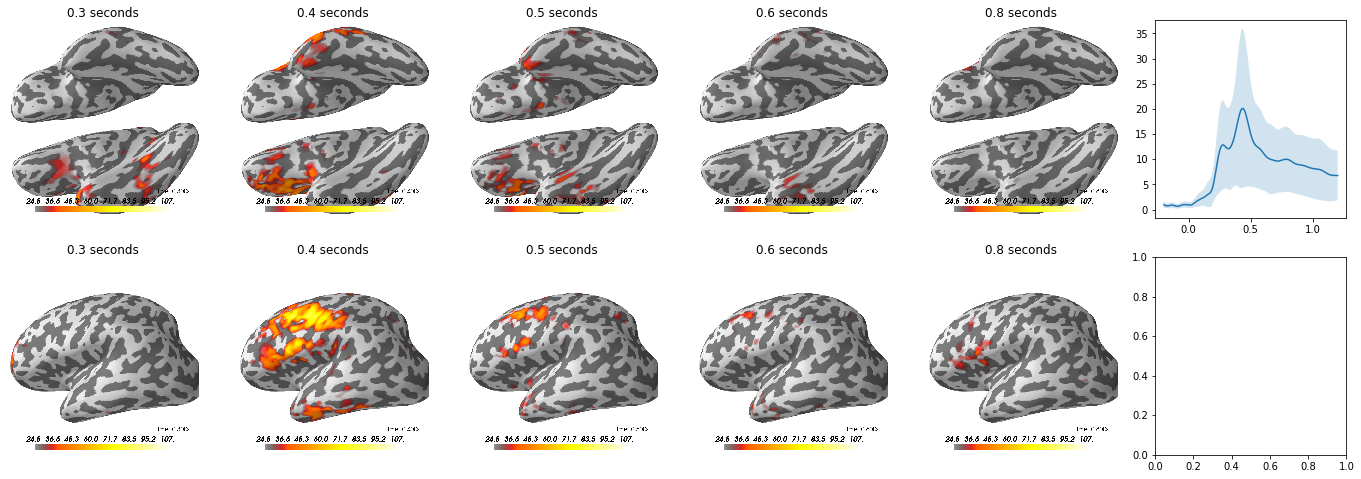

S08 RSVP_MRI_S08


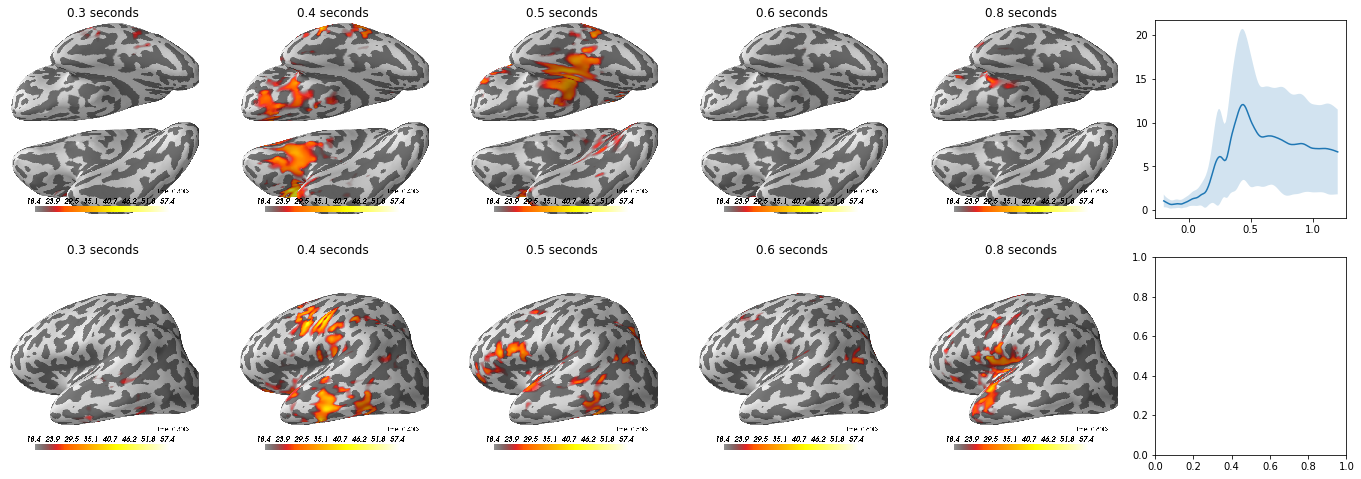

S09 RSVP_MRI_S09


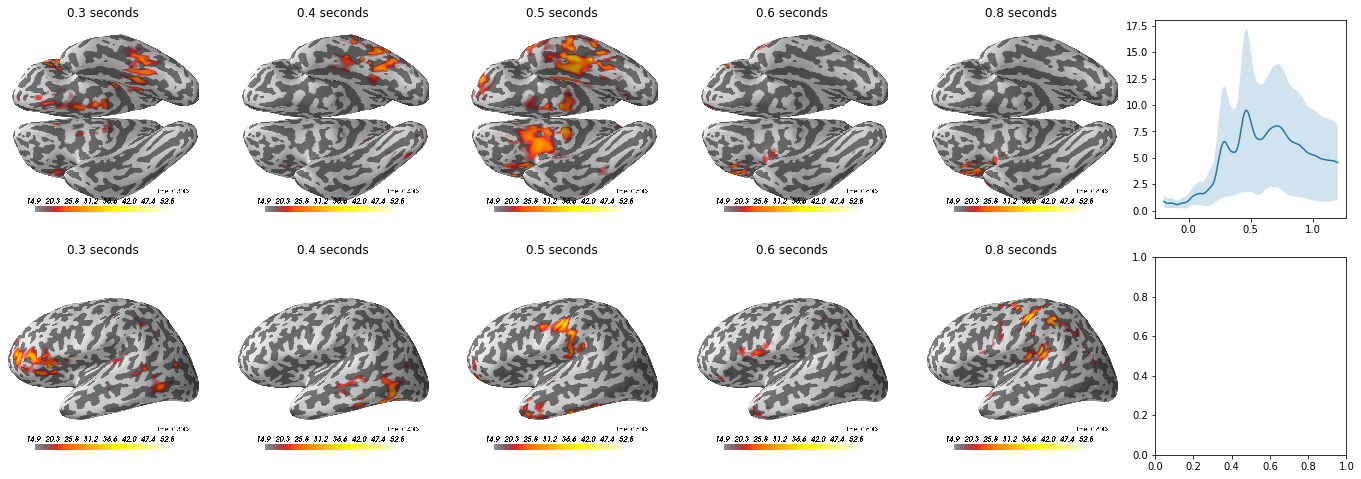

S10 RSVP_MRI_S10


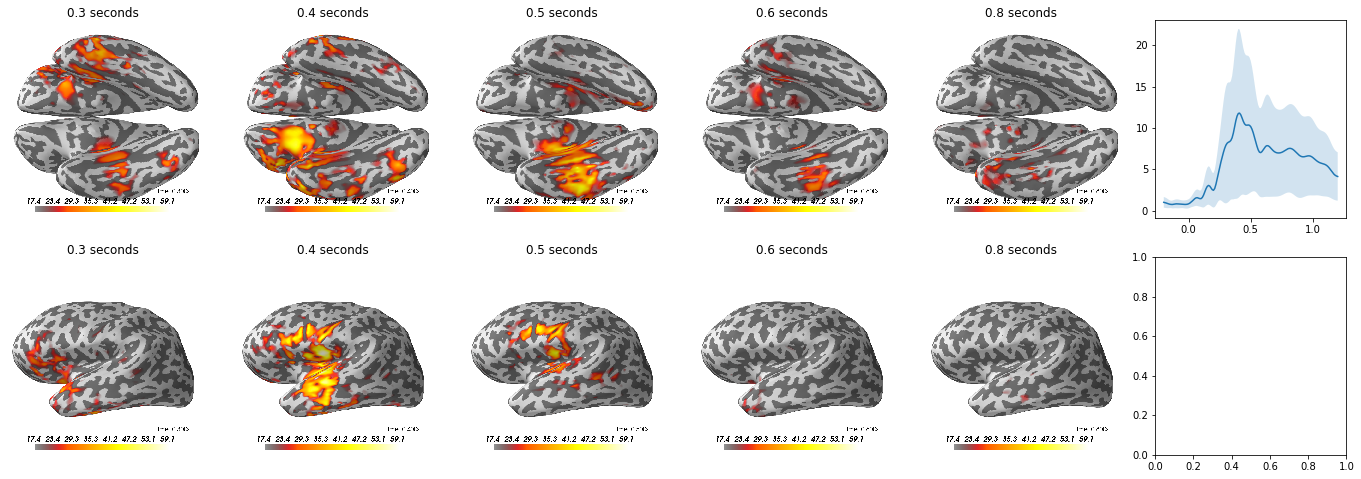

In [4]:
infos = collections.defaultdict(dict)

for j in range(1, 11):
    sid = Subject_ids.format(id=j)
    FS_subject = 'RSVP_MRI_{}'.format(sid)
    print(sid, FS_subject)
    infos[sid]['FS_subject'] = FS_subject
    
    stc = mne.source_estimate.read_source_estimate(os.path.join('results', '{}.stc'.format(sid)))
    stc.subject = FS_subject
    infos[sid]['stc'] = stc
    inv_src = mne.read_source_spaces(os.path.join('results', '{}-src.fif'.format(sid)))
    infos[sid]['inv_src'] = inv_src
    
    alldata = sorted(stc.data.ravel(), reverse=True)
    n = len(alldata)
    clim = dict(kind='value', lims=[alldata[int(n * r)] for r in [0.05, 0.01, 0]])

    fig, axes = plt.subplots(2, len(times)+1, figsize=((len(times)+1) * 4, 8))

    stc_mean = stc.data.mean(0)
    stc_var = stc.data.std(0)
    ax = axes[0][-1]
    ax.plot(stc.times, stc_mean)
    ax.fill_between(stc.times, stc_mean - stc_var, stc_mean + stc_var, alpha=0.2)

    for j, time in enumerate(times):
        brain = stc.plot(subjects_dir=FS_subjects_dir, hemi='both', clim=clim,
                         initial_time=time, background='w', foreground='k')

        im = []
        brain.show_view('ven')
        im.append(brain.screenshot())
        brain.show_view('med')
        im.append(brain.screenshot())
        brain.close()

        for i in range(2):
            ax = axes[i][j]
            ax.imshow(im[i])
            ax.axis('off')
            ax.get_xaxis().set_visible(False)
            ax.get_yaxis().set_visible(False)
            ax.set_title('{} seconds'.format(time))
    
    plt.show()

mean


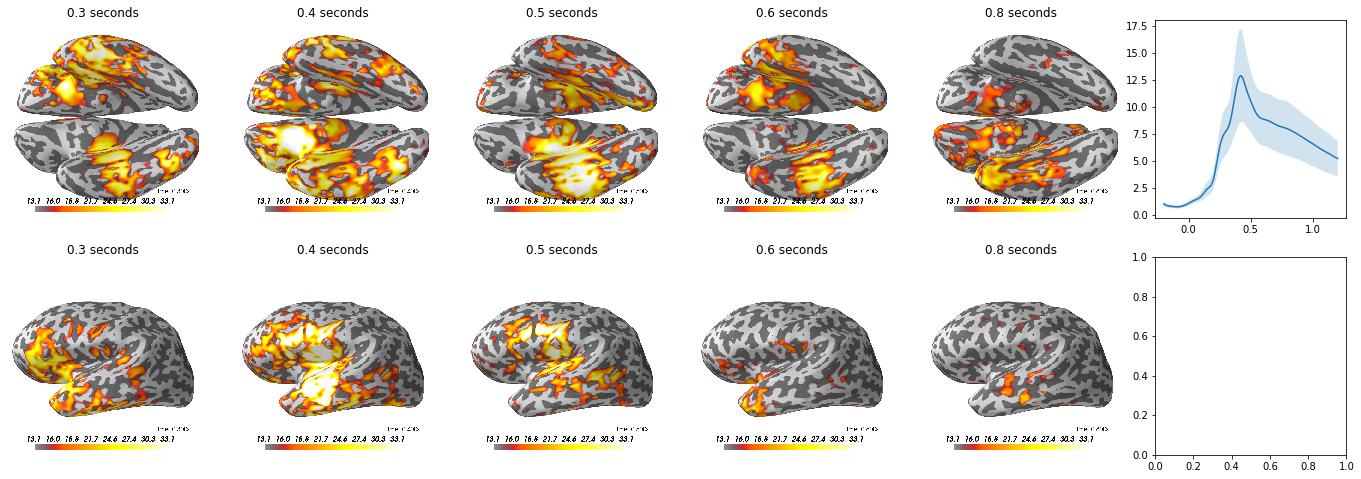

In [6]:
###############################################################################################################################
# Draw mean
print('mean')
stcdata =  sum(e['stc'].data for e in infos.values()) / len(infos)
alldata = sorted(stcdata.ravel(), reverse=True)
n = len(alldata)
clim = dict(kind='value', lims=[alldata[int(n * r)] for r in [0.05, 0.01, 0]])

fig, axes = plt.subplots(2, len(times)+1, figsize=((len(times)+1) * 4, 8))

stc_mean = stcdata.mean(0)
stc_var = stcdata.std(0)
ax = axes[0][-1]
ax.plot(stc.times, stc_mean)
ax.fill_between(stc.times, stc_mean - stc_var, stc_mean + stc_var, alpha=0.2)

for j, time in enumerate(times):
    brain = stc.plot(subjects_dir=FS_subjects_dir, hemi='both', clim=clim,
                     initial_time=time, background='w', foreground='k')

    im = []
    brain.show_view('ven')
    im.append(brain.screenshot())
    brain.show_view('med')
    im.append(brain.screenshot())
    brain.close()

    for i in range(2):
        ax = axes[i][j]
        ax.imshow(im[i])
        ax.axis('off')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        ax.set_title('{} seconds'.format(time))

In [ ]:
# # https://mne.tools/stable/auto_examples/connectivity/plot_mne_inverse_envelope_correlation.html#sphx-glr-auto-examples-connectivity-plot-mne-inverse-envelope-correlation-py
# labels = mne.read_labels_from_annot(FS_subject, 'aparc', subjects_dir=FS_subjects_dir)

# label_ts = mne.extract_label_time_course(stc, labels, inv_src, return_generator=True)

# lines = plt.plot(label_ts.transpose())
# for line, label in zip(lines, labels):
#     line.set_label(label.name)
# plt.legend(loc='best', bbox_to_anchor=(1.1, 0.5, 0.5, 0.5), ncol=5, handleheight=2, labelspacing=0.05)
# plt.show()

In [17]:
for sid in infos:
    FS_subject = infos[sid]['FS_subject']
    print(sid, FS_subject)
    labels = mne.read_labels_from_annot(FS_subject, 'aparc', subjects_dir=FS_subjects_dir)
    label_ts = mne.extract_label_time_course(infos[sid]['stc'], labels, infos[sid]['inv_src'], return_generator=True)
    infos[sid]['name'] = [e.name for e in labels]
    infos[sid]['ts'] = label_ts
    print(label_ts.shape)

S01 RSVP_MRI_S01
(68, 141)
S02 RSVP_MRI_S02
(68, 141)
S03 RSVP_MRI_S03
(68, 141)
S04 RSVP_MRI_S04
(68, 141)
S05 RSVP_MRI_S05
(68, 141)
S06 RSVP_MRI_S06
(68, 141)
S07 RSVP_MRI_S07
(68, 141)
S08 RSVP_MRI_S08
(68, 141)
S09 RSVP_MRI_S09
(68, 141)
S10 RSVP_MRI_S10
(68, 141)


In [110]:
times = stc.times
all_ts = np.concatenate([np.expand_dims(e['ts'], 0) for e in infos.values()])
mean_ts = np.mean(all_ts, 0)
std_ts = np.std(all_ts, 0)
all_ts.shape, mean_ts.shape, std_ts.shape

((10, 68, 141), (68, 141), (68, 141))

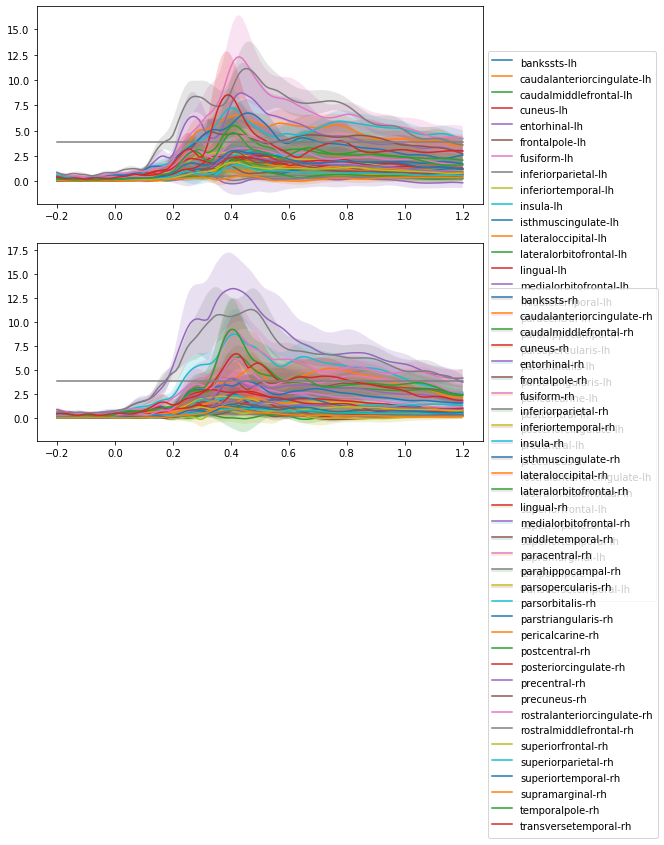

In [168]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 8))

limits = [0, 1]
_limits = np.all([times>limits[0], times<limits[1]], axis=0)

threshold = 2 * np.std(mean_ts)

for name, mean, std in zip(infos[sid]['name'], mean_ts, std_ts):
    if np.mean(mean) < threshold:
        pass
        # continue
        
    if name.endswith('-lh'):
        ax = axes[0]
    else:
        ax = axes[1]
    ax.plot(times, mean, label=name)
    ax.fill_between(times, mean-std/2, mean+std/2, alpha=0.2)
    
for ax in axes:
    ax.plot(times, times * 0 + threshold, 'gray')
    ax.legend(loc='best', bbox_to_anchor=(1, 0.8), ncol=1, handleheight=2, labelspacing=0.05)

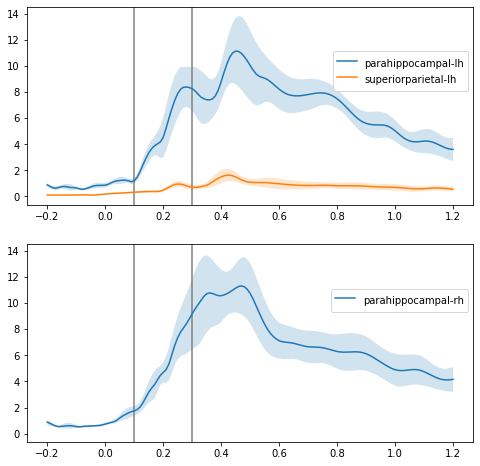

In [142]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 8))
limits = [0.1, 0.3]
_limits = np.all([times>limits[0], times<limits[1]], axis=0)

for name, mean, std in zip(infos[sid]['name'], mean_ts, std_ts):
    if np.mean(mean[_limits]) < 2 * np.mean(std[_limits]):
        pass
        continue
    if name.endswith('-lh'):
        ax = axes[0]
    else:
        ax = axes[1]
    ax.plot(times, mean, label=name)
    ax.fill_between(times, mean-std/2, mean+std/2, alpha=0.2)

ylim = ax.get_ylim()
for ax in axes:
    for l in limits:
        ax.vlines(l, ylim[0], ylim[1], color='gray')
    ax.set_ylim(ylim)
    ax.legend(loc='best', bbox_to_anchor=(1, 0.8), ncol=1, handleheight=2, labelspacing=0.05)

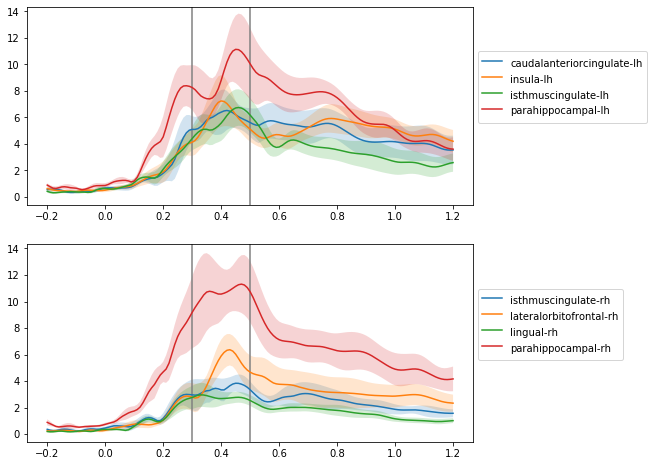

In [143]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 8))
limits = [0.3, 0.5]
_limits = np.all([times>limits[0], times<limits[1]], axis=0)

for name, mean, std in zip(infos[sid]['name'], mean_ts, std_ts):
    if np.mean(mean[_limits]) < 2 * np.mean(std[_limits]):
        pass
        continue
    if name.endswith('-lh'):
        ax = axes[0]
    else:
        ax = axes[1]
    ax.plot(times, mean, label=name)
    ax.fill_between(times, mean-std/2, mean+std/2, alpha=0.2)

ylim = ax.get_ylim()
for ax in axes:
    for l in limits:
        ax.vlines(l, ylim[0], ylim[1], color='gray')
    ax.set_ylim(ylim)
    ax.legend(loc='best', bbox_to_anchor=(1, 0.8), ncol=1, handleheight=2, labelspacing=0.05)

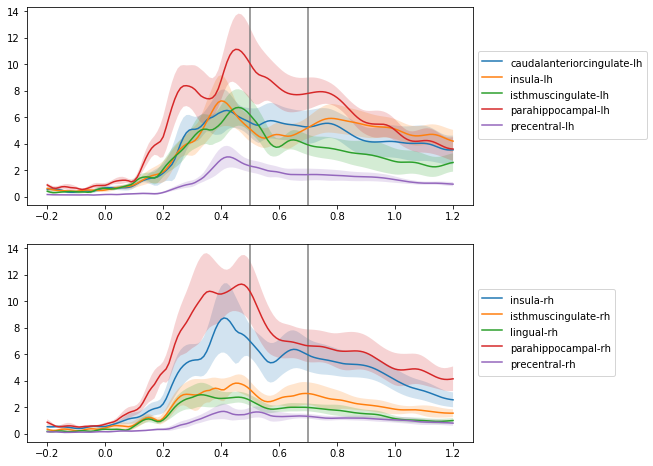

In [144]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 8))
limits = [0.5, 0.7]
_limits = np.all([times>limits[0], times<limits[1]], axis=0)

for name, mean, std in zip(infos[sid]['name'], mean_ts, std_ts):
    if np.mean(mean[_limits]) < 2 * np.mean(std[_limits]):
        pass
        continue
    if name.endswith('-lh'):
        ax = axes[0]
    else:
        ax = axes[1]
    ax.plot(times, mean, label=name)
    ax.fill_between(times, mean-std/2, mean+std/2, alpha=0.2)

ylim = ax.get_ylim()
for ax in axes:
    for l in limits:
        ax.vlines(l, ylim[0], ylim[1], color='gray')
    ax.set_ylim(ylim)
    ax.legend(loc='best', bbox_to_anchor=(1, 0.8), ncol=1, handleheight=2, labelspacing=0.05)

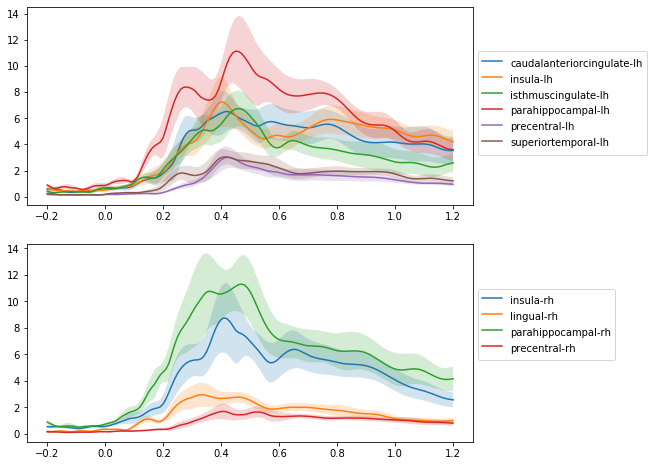

In [145]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 8))
for name, mean, std in zip(infos[sid]['name'], mean_ts, std_ts):
    if np.mean(mean) < 2 * np.mean(std):
        continue
    if name.endswith('-lh'):
        ax = axes[0]
    else:
        ax = axes[1]
    ax.plot(times, mean, label=name)
    ax.fill_between(times, mean-std/2, mean+std/2, alpha=0.2)

for ax in axes:
    ax.legend(loc='best', bbox_to_anchor=(1, 0.8), ncol=1, handleheight=2, labelspacing=0.05)